# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
#df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')
df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [3]:
#df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [4]:
#df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [5]:
df_test.shape

(14910, 52)

In [104]:
df_train.head()
#df_train['TARGET'].value_counts()

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [5]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [90]:
df_test

In [6]:
df = df_test.append(df_train).reset_index(drop=True)

In [7]:
df.shape
set(df['sample'])

{'test', 'train'}

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

Видим, что часть данных - object, скорее всего строки.


Давайте выведем эти значения для каждого столбца

In [181]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print('+'*10)
        #print(df[i].unique())
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Ученая степень', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Строительство', 'Страхование', 'Энергетика', 'Сельское хозяйство', 'Наука', 'Информационные технологии', 'Логистика', 'Торговля', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Подбор персонала', 'Управляющая компания', 'Маркетинг', 'Здравоохранение', 'Информационные услуги', 'Транспорт', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Государственная служба', 'Недвижимость', 'Образование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [8]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть, в зависимости от размера выборки их можно удалить или заполнить. Пропуски в категориальных данных заполняем
наиболее частым значением или новым придуманным значением. Пропуски в числовых данных заполняем средней, нулем или каким-либо
заградительным значением, например: '- 99999'

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные данные необходимо закодировать числовыми признаками. Для этого используется функция get_dummies

#### Задание 3. Функция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [9]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        if str(df[i].dtype) == 'object':
            df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
      
    
    #df_output = df_output.fillna(df_output.mean())
    #df_output.CREDIT[df_output.CREDIT.isnull()] = df_output.CREDIT.mean()
    df_output = df_output.fillna(0)
         
    text_features = [col for col in df_output.columns if (df_output[col].dtype == 'object' and str(col)!='sample')]    
    
    #data_describe = df_output.describe(include=[object])
    for c in text_features:
        #df_output[c] = df_output[c].fillna(data_describe[c]['top'])
        df_output[c] = df_output[c].fillna('ПУСТО') 
    
    text_data = pd.get_dummies(df_output[text_features], prefix = text_features, drop_first = False)
    
    numeric_features = [col for col in df_output.columns if df_output[col].dtype != 'object']
   
    df_output = pd.concat([df_output[numeric_features], text_data, df_output['sample'] ], axis = 1)
    
    return df_output

In [10]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 451 entries, TARGET to sample
dtypes: float64(7), int64(31), object(1), uint8(412)
memory usage: 20.8+ MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [11]:
X=df_train_preproc.drop(['TARGET'], axis=1)
#y=df_train_preproc['TARGET'].copy()
y=df_train_preproc['TARGET']
print(X.shape, y.shape)

X_model_test=df_test_preproc.drop(['TARGET'], axis=1)
#y_test=df_test_preproc['TARGET'].copy()
y_model_test=df_test_preproc['TARGET']
print(X_model_test.shape, y_model_test.shape)

#X

(15223, 449) (15223,)
(14910, 449) (14910,)


#### Задание 5. Обучение и оценка качества разных моделей

In [13]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10656, 449) (10656,)
(4567, 449) (4567,)


In [14]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predict = dtc.predict(x_train)
#predict = dtc.predict_proba(x_train)


In [15]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.ensemble import RandomForestClassifier

## Your Code Here
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predict = rfc.predict(x_train)
#predict = dtc.predict_proba(x_train)


In [16]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.linear_model import LogisticRegression

## Your Code Here
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
predict = logreg.predict(x_train)
#predict = dtc.predict_proba(x_train)

In [17]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score #, f1_score, mean_squared_error, r2_score

## Your Code Here
print('precision_score = ', precision_score(y_train, predict) )
print('recall_score = ', recall_score(y_train, predict) )
print('accuracy_score = ', accuracy_score(y_train, predict) )
#print('f1_score = ', f1_score(y_train, predict) )
#print('mean_squared_error = ', mean_squared_error(y_train, predict) )
#print('r2_score = ', r2_score(y_train, predict) )


precision_score =  0.428571428571
recall_score =  0.00238663484487
accuracy_score =  0.881944444444


In [ ]:
#результаты на сплит-тесте

In [18]:
predict_dtc = dtc.predict(x_test)
predict_rfc = rfc.predict(x_test)
predict_logreg = logreg.predict(x_test)

print('')
print('dtc')
print('='*10)
print('precision_score = ', precision_score(y_test, predict_dtc) )
print('recall_score = ', recall_score(y_test, predict_dtc) )
print('accuracy_score = ', accuracy_score(y_test, predict_dtc) )

print('')
print('rfc')
print('='*10)
print('precision_score = ', precision_score(y_test, predict_rfc) )
print('recall_score = ', recall_score(y_test, predict_rfc) )
print('accuracy_score = ', accuracy_score(y_test, predict_rfc) )

print('')
print('logreg')
print('='*10)
print('precision_score = ', precision_score(y_test, predict_logreg) )
print('recall_score = ', recall_score(y_test, predict_logreg) )
print('accuracy_score = ', accuracy_score(y_test, predict_logreg) )


dtc
precision_score =  0.162705667276
recall_score =  0.16036036036
accuracy_score =  0.797679001533

rfc
precision_score =  0.263157894737
recall_score =  0.00900900900901
accuracy_score =  0.876505364572

logreg
precision_score =  0.285714285714
recall_score =  0.0036036036036
accuracy_score =  0.877819137289


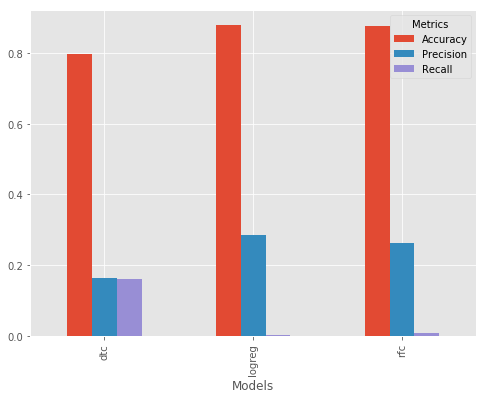

In [19]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
data = pd.DataFrame({'Models':['dtc']*3 + ['rfc']*3 + ['logreg']*3, 
                     'Metrics':['Precision','Recall', 'Accuracy']*3, 
                     'Score':
                     [
                         precision_score(y_test, predict_dtc),recall_score(y_test, predict_dtc),accuracy_score(y_test, predict_dtc),
                         precision_score(y_test, predict_rfc),recall_score(y_test, predict_rfc),accuracy_score(y_test, predict_rfc),
                         precision_score(y_test, predict_logreg),recall_score(y_test, predict_logreg),accuracy_score(y_test, predict_logreg)
                     ]})
#print(data)


_, ax = plt.subplots(figsize=(8,6))

data.pivot_table(values='Score', index='Models', columns='Metrics', aggfunc='max').plot(
    kind='bar' ,  ax=ax
)
plt.show()

dtc: roc_auc_score =  0.523101416471
rfc: roc_auc_score =  0.502759738802
logreg: roc_auc_score =  0.501178671194


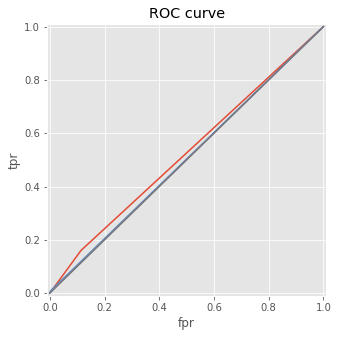

In [20]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой модели

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_rfc)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, predict_logreg)
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_logreg, tpr_logreg)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print ('dtc: roc_auc_score = ' ,roc_auc_score(y_test, predict_dtc))
print ('rfc: roc_auc_score = ' ,roc_auc_score(y_test, predict_rfc))
print ('logreg: roc_auc_score = ' ,roc_auc_score(y_test, predict_logreg))

In [21]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
print('dtc roc_auc = ',
cross_val_score(
    dtc,
    x_test,
    y_test,
    scoring='roc_auc',
    cv=10
).mean()
)
print('rfc roc_auc = ',
cross_val_score(
    rfc,
    x_test,
    y_test,
    scoring='roc_auc',
    cv=10
).mean()
)
print('logreg roc_auc = ',
cross_val_score(
    logreg,
    x_test,
    y_test,
    scoring='roc_auc',
    cv=10
).mean()
)

dtc roc_auc =  0.518299576985
rfc roc_auc =  0.582985811482
logreg roc_auc =  0.657869096682


In [22]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
model_predict_proba = logreg.predict_proba(X_model_test)
model_predict_proba

array([[ 0.83735826,  0.16264174],
       [ 0.93866296,  0.06133704],
       [ 0.81634475,  0.18365525],
       ..., 
       [ 0.81818059,  0.18181941],
       [ 0.95403246,  0.04596754],
       [ 0.81638513,  0.18361487]])

In [ ]:
# Померить roc_auc на тесте


In [24]:
model_predict = logreg.predict(X_model_test)
#print ('logreg_model: roc_auc_score = ' , roc_auc_score(y_model_test, model_predict))
print ('logreg_model: roc_auc_score = ' , roc_auc_score(y_model_test, model_predict_proba[:, 1]))

logreg_model: roc_auc_score =  0.619649109857
